### Importing all modules and loading spamDetection data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
data=pd.read_csv('smsspam.csv',usecols=['output','Text'])
data.head()

,output,Text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


### converting categorical output to boolean

In [2]:
data.output=pd.Categorical(data.output,ordered=True).codes

### ploting output to observe the ratio of output

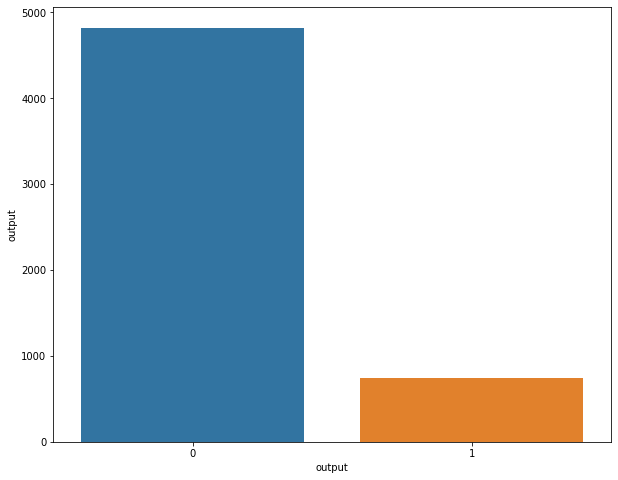

In [3]:
plt.subplots(figsize=(10,8))
sns.barplot(y=data.output.value_counts(),x=data.output)
plt.show()

### Text processing :- 
#### 1.sorting unwanted symbols and numbers
####    2.lowering the alphabets
####       3.lematizing each words
####          4.removing stop words

In [4]:
lematizer=WordNetLemmatizer()
rt=[]
for i in range(len(data.output)):
    text=re.sub("[^a-zA-Z]",' ',data.Text[i])
    text=text.lower()
    text=text.split()
    
    p=[lematizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    r=' '.join(p)
    rt.append(r)

    
 

### converting all words to an array of 3000  columns

In [5]:
cv=CountVectorizer(max_features=3000)
x=pd.DataFrame(cv.fit_transform(data.Text).toarray())

In [6]:
len(x[0])

5569

In [7]:
x

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### concatinating all the data 

In [8]:
concate=pd.concat([data.output,x],axis=1)
concate

,output,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### spliting the data using stratifiedShufflesplit as ratio of output is not even

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
splits=StratifiedShuffleSplit(n_splits=1,random_state=42)
for train_index,test_index in splits.split(concate,concate['output']):
    train_data=concate.iloc[train_index]
    test_data=concate.iloc[test_index]


In [10]:
y_train,y_test=train_data.iloc[:,0],test_data.iloc[:,0]
x_train,x_test=train_data.iloc[:,1:],test_data.iloc[:,1:]


### using MultinomialNB model 

In [11]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
p=model.predict(x_test)
p[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
y_test[:20]

185     0
4510    1
2100    0
79      0
3313    1
       ..
1970    0
3671    0
5041    0
700     0
586     0
Name: output, Length: 557, dtype: int8

### getting classification metrics and accuracy score of test data

In [14]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,p))
print('Test accuracy is: {0}'.format(accuracy_score(y_test,p)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       482
           1       0.93      0.93      0.93        75

    accuracy                           0.98       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.98      0.98      0.98       557

0.9820466786355476


In [15]:
w=model.predict(x_train)

### getting classification metrics and accuracy score of train data

In [19]:
print(classification_report(y_train,w))
print('Train accuracy is: {0}'.format(accuracy_score(y_train,w)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4341
           1       0.97      0.96      0.96       671

    accuracy                           0.99      5012
   macro avg       0.98      0.98      0.98      5012
weighted avg       0.99      0.99      0.99      5012

Train accuracy is: 0.9906225059856345
